# **Species Classification — Iris Flower Dataset**

Mark Hodierne  
ML Project Portfolio  
7th March 2024  
https://github.com/markhodierne/iris-recognition  
https://www.linkedin.com/in/markhodierne  


---

#### ***Status: PROJECT COMPLETE***

1. Neural Network built.
1. Optimization - experimented with size of hidden layer, learning rates, number of epochs and batch size.
3. Performance of model optimizations analyzed and opportunities for further improvements identified.
4. Conclusions complete, including summary of learning.



---

### **About this project**

The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis." (1)

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The goal of this project is to build a simple neural network that will classify samples correctly based on these four features.






<u>References:</u>

1. R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179-188



---

### **Implementation approach**

A simple perceptron model with one hidden layer will be built to achieve this goal. The model will be built from first principles - no Deep Learning Python libraries will be used. The focus will be on understanding exactly how a neural network operates at the lowest level.





![](https://drive.google.com/uc?export=view&id=1mbRPZHaJTkO9djR6l1NY7WBWSUOWPbQL)

There are 4 units in the input layer, one for each of the 4 features to be input into the model. Initially, the hidden layer will have 6 units. Testing will refine this number so that the complexity of the resultant model is appropriate for the task. The output layer will have 3 units to indicate which of the 3 species of Iris is predicted based on the input data.

Activation functions will be ReLU for the hidden layer and Softmax for the output layer.

The shape of the matrices are shown in the diagram below, where n represents the number of samples input to the network.




![](https://drive.google.com/uc?export=view&id=1jrJJNIYagcRqipLiY8ehy6fpDE7re0gw)

The Iris Dataset is extremely small at 150 samples. A test set will be created using 20% of the data and the remaining 80% will be used for training the model using k-fold cross-validation. This will help mitigate the risk of overfitting to any single train/validation split.



Once the model has been trained and optimized, a Docker image will be created containing a FastAPI application and the ML model. The container will be deployed to a bare metal server (with a process manager (like systemd) or container orchestration to keep it running). The FastAPI endpoints will be exposed for prediction requests and logs/metrics will be integrated for observability.

Full code is included in the GitHub repository - https://github.com/markhodierne/iris-recognition.

### **Implementation Approach: Building a Neural Network From First Principles**

This project demonstrates how to construct, train, and evaluate a simple **perceptron model with one hidden layer**—all from first principles, **without using any deep learning libraries**.  
The primary objective is to provide complete transparency into how neural networks work at the lowest level, exposing all mathematical operations involved in learning and prediction.

#### **Network Architecture**

- Input Layer: 4 units, one for each feature of the Iris dataset (sepal length, sepal width, petal length, petal width).
- Hidden Layer: Starts with 6 units (this is a tunable hyperparameter; later experimentation will find the optimal number for this problem).
- Output Layer: 3 units, each representing one of the Iris species.

**Activation functions:**

- **ReLU** (Rectified Linear Unit) for the hidden layer:  
  $\mathrm{ReLU}(x) = \max(0, x)$

- **Softmax** for the output layer:  
  $\mathrm{softmax}(z_j) = \dfrac{e^{z_j}}{\sum_{l=1}^{k} e^{z_l}}$,  
  where $k$ is the number of classes.

**Activation functions:**

- **ReLU (Rectified Linear Unit)** for the hidden layer.
- **Softmax** for the output layer.

The formulas are:
\[
\mathrm{ReLU}(x) = \max(0, x)
\]
\[
\mathrm{softmax}(z_j) = \frac{e^{z_j}}{\sum_{l=1}^{k} e^{z_l}}
\]
where $k$ is the number of classes.



#### **Data Flow and Matrix Shapes**

If $n$ is the number of samples:

- Input matrix: $\mathbf{X} \in \mathbb{R}^{n \times 4}$
- First layer weights: $\mathbf{W}_1 \in \mathbb{R}^{4 \times h}$
- First layer biases: $\mathbf{b}_1 \in \mathbb{R}^{1 \times h}$
- Hidden activations: $\mathbf{A}_1 \in \mathbb{R}^{n \times h}$
- Second layer weights: $\mathbf{W}_2 \in \mathbb{R}^{h \times 3}$
- Second layer biases: $\mathbf{b}_2 \in \mathbb{R}^{1 \times 3}$
- Output probabilities: $\mathbf{A}_2 \in \mathbb{R}^{n \times 3}$

#### **Dataset Characteristics and Evaluation Strategy**

- The Iris Dataset is extremely small - containing only 150 samples:
  - 80% of the data is used for training (no validation dataset used)
  - 20% of the data is reserved as a test set.

#### **Deployment Plan**

- Once the model is trained and optimized, it can be **packaged in a Docker image** alongside a **FastAPI application** to serve predictions.
- The container can be deployed to a production environment (e.g., bare metal server), using a process manager (like `systemd`) or container orchestration for reliability.
- **Observability** (logging and metrics) will be integrated for monitoring model usage and health.


Full code is included in the GitHub repository - https://github.com/markhodierne/iris-recognition.

---

# **1. Setup**

- Load the Python libraries required for the project
- Load the IRIS dataset from scikit-learn as a Pandas Dataframe
- Create NumPy matrices of the features data and labels data
- Create training and validation datasets


In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Set global random seed for reproducibility
np.random.seed(42)


In [ ]:
# Load data and preprocess
iris = datasets.load_iris()
iris_df = pd.DataFrame(
    data=np.column_stack([iris.data, iris.target]),
    columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
)
iris_df.dropna(how="all", inplace=True)

# Create a features matrix X with dimensions (150, 4)
X = iris_df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']].values

# Create a labels matrix y with dimensions (150, 3)
y = pd.get_dummies(iris_df['class']).to_numpy()

# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=21
)

# Modify datasets to single sample for testing
#X_train = X_train[0].reshape(1, -1)
#y_train = y_train[0].reshape(1, -1)

# Modify datasets to first 4 samples for testing
#X_train = X_train[:5, :]
#y_train = y_train[:5, :]

In [3]:
# Data exploration (optional)
print(iris_df.head())
print(iris_df.info())

   sepal_len  sepal_wid  petal_len  petal_wid  class
0        5.1        3.5        1.4        0.2    0.0
1        4.9        3.0        1.4        0.2    0.0
2        4.7        3.2        1.3        0.2    0.0
3        4.6        3.1        1.5        0.2    0.0
4        5.0        3.6        1.4        0.2    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None


A k-means analysis shows that one flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

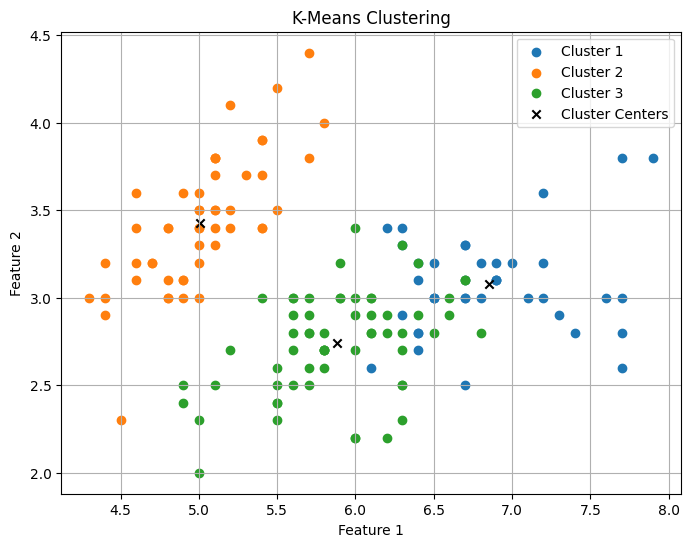

In [ ]:
# K-means clustering for EDA (optional)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))

for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f'Cluster {i+1}'
    )

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    marker='x',
    color='k',
    label='Cluster Centers'
)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Utility functions (activation, loss)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

def cross_entropy(y_pred, y_true):
    eps = 1e-12
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

In [ ]:
# Neural network class from scratch

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        dZ2 = y_pred - y_true
        dW2 = self.A1.T @ dZ2 / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = X.T @ dZ1 / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=100, batch_size=16, X_val=None, y_val=None):
        history = {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []}
        n_samples = X.shape[0]
        for epoch in range(epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch, y_pred)
            y_train_pred = self.forward(X)
            train_loss = cross_entropy(y_train_pred, y)
            train_acc = np.mean(np.argmax(y_train_pred, axis=1) == np.argmax(y, axis=1))
            history['loss'].append(train_loss)
            history['acc'].append(train_acc)
            if X_val is not None and y_val is not None:
                y_val_pred = self.forward(X_val)
                val_loss = cross_entropy(y_val_pred, y_val)
                val_acc = np.mean(np.argmax(y_val_pred, axis=1) == np.argmax(y_val, axis=1))
                history['val_loss'].append(val_loss)
                history['val_acc'].append(val_acc)
                print(f"Epoch {epoch + 1}/{epochs} | Loss: {train_loss:.4f} | Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
            else:
                print(f"Epoch {epoch + 1}/{epochs} | Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
        return history

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

In [ ]:
# Set hyperparameters
input_size = X_train.shape[1]
hidden_size = 6
output_size = y_train.shape[1]
learning_rate = 0.05
epochs = 100
batch_size = 16

In [ ]:
# Instantiate model
nn = SimpleNeuralNetwork(
    input_size=input_size,
    hidden_size=hidden_size,
    output_size=output_size,
    learning_rate=learning_rate
)

In [ ]:
# Train model
history = nn.train(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    X_val=X_test, 
    y_val=y_test
)

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['acc'], label='Train Acc')
plt.plot(history['val_acc'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Evaluate on test data
y_test_pred = nn.forward(X_test)
test_loss = cross_entropy(y_test_pred, y_test)
test_acc = np.mean(np.argmax(y_test_pred, axis=1) == np.argmax(y_test, axis=1))

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
# Show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = nn.predict(X_test)

cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [ ]:
# Experiment: Tune hidden layer size
hidden_sizes = [2, 4, 6, 8, 12]
val_accuracies = []

for h in hidden_sizes:
    nn = SimpleNeuralNetwork(
        input_size=input_size,
        hidden_size=h,
        output_size=output_size,
        learning_rate=learning_rate
    )
    _ = nn.train(X_train, y_train, epochs=epochs, batch_size=batch_size, X_val=X_test, y_val=y_test)
    y_pred = nn.forward(X_test)
    acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    val_accuracies.append(acc)

In [ ]:
# Plot validation accuracy vs. hidden layer size
plt.figure(figsize=(8, 4))
plt.plot(hidden_sizes, val_accuracies, marker='o')
plt.title("Validation Accuracy vs. Hidden Layer Size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Validation Accuracy")

plt.show()

---

# **2. Initializing weights and biases**


- Hidden Layer (ReLU Activation): Use He initialization, which scales random values from a standard normal distribution (mean = 0, variance = 1), so the variance is approximately (2/hidden_units). This helps prevent vanishing or exploding gradients, which can occur with ReLU activations. Biases are initialized to 0 values.

- Output Layer (Softmax Activation): Use Xavier initialization, which scales random values from a standard normal distribution (mean = 0, variance = 1), so the variance is approximately (1/hidden_units). This is well-suited for sigmoid-like activations such as softmax. Biases are initialized to 0 values.

In [ ]:
# Number of units in each layer
input_units = X.shape[1]
hidden_units = 6
output_units = y.shape[1]

# Initialize weights for the input to hidden layer (using He initialization)
w1 = np.random.randn(input_units, hidden_units) * np.sqrt(2 / input_units)

# Initialize weights for the input to hidden layer to zeros (used for testing)
#w1 = np.zeros((input_units, hidden_units))

# Initialize biases for the hidden layer
b1 = np.zeros(hidden_units)

# Initialize weights for the hidden to output layer (using Xavier initialization)
w2 = np.random.randn(hidden_units, output_units) * np.sqrt(1 / hidden_units)

# Initialize weights for the hidden to output layer (used for testing)
#w2 = np.zeros((hidden_units, output_units))

# Initialize biases for the output layer
b2 = np.zeros(output_units)


---

# **3. Functions**

In [ ]:


def back_propagation(X, y_true, a1, a2, learning_rate):
    # Back propagation algorithm to compute the gradients and update weights and biases

    global w1, b1, w2, b2

    # Previous code attempt - how is this different from below?
    #da2 = -np.divide(y_true, a2)
    #dz2 = da2 * (a2 * (1 - a2))

    # Compute gradients
    dz2 = a2 - y_true
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    da1 = np.dot(dz2, w2.T)
    dz1 = da1 * relu_derivative(a1)
    dw1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Update weights and biases
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    return




def generate_batches(X, y, batch_size):
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)  # Shuffle indices to randomize the data
    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]


def calculate_accuracy(y_true, y_pred):
    max_indices = np.argmax(y_pred, axis=1)
    y_pred_encoded = np.zeros(y_pred.shape, dtype=int)
    rows = np.arange(y_pred.shape[0])
    y_pred_encoded[rows, max_indices] = 1
    accuracy = np.mean(np.all(y_pred_encoded == y_true, axis=1)) * 100
    return accuracy


In [ ]:
class NeuralNetwork:
    """
    Simple neural network with one hidden layer.
    """
    def __init__(
        self,
        input_dim: int,
        hidden_dim: int,
        output_dim: int,
        lr: float = 1e-3,
        lr_decay: float = 0.0,
        seed: int = 21,
    ) -> None:
        """
        Parameters
        ----------
        input_dim : int
            Number of features per sample
        hidden_dim : int
            Neurons in the single hidden (ReLU) layer
        output_dim : int
            Number of classes (soft-max outputs)
        lr : float, default 1e-3
            Initial learning-rate for SGD
        lr_decay : float, default 0.0
            Exponential decay factor applied each step:
            lr ← lr / (1 + lr_decay · step)
        seed : int, default 21
            RNG seed for reproducibility
        """
        # Store hyper-parameters
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lr = lr
        self.lr_decay = lr_decay

        # Reproducible random generator
        self.rng = np.random.default_rng(seed)

        # -----------------------------------------------------------------
        # Parameter initialisation
        # -----------------------------------------------------------------
        # He (Kaiming) for ReLU layer
        self.w1 = self.rng.standard_normal((input_dim, hidden_dim)) * np.sqrt(2.0 / input_dim)
        self.b1 = np.zeros(hidden_dim)

        # Xavier (Glorot) for softmax layer
        self.w2 = self.rng.standard_normal((hidden_dim, output_dim)) * np.sqrt(1.0 / hidden_dim)
        self.b2 = np.zeros(output_dim)

        # Internal step counter for learning-rate decay
        self._step = 0

    # ------------------------------------------------------------------
    # Forward + backward passes
    # ------------------------------------------------------------------
    def _relu(x):
        return np.maximum(x, 0)

    def _relu_derivative(x):
        return np.where(x > 0, 1, 0)

    def _softmax(x):
        # Subtract the max value of x to ensure numerical stability
        x -= np.max(x, axis=1, keepdims=True)
        exp_scores = np.exp(x)
        softmax_scores = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return softmax_scores

    def cat_cross_entropy(y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        sample_losses = -np.sum(y_true * np.log(y_pred), axis=1)
        avg_loss = np.sum(sample_losses) / len(y_true)
        return avg_loss

    def _forward(
        self, X:
        np.ndarray
    ) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        z1 = np.dot(X, self.w1) + self.b1  # (n, hidden)
        a1 = _relu(z1)
        z2 = np.dot(a1, self.w2) + self.b2  # (n, output)
        a2 = _softmax(z2)
        return a1, a2, z1

    def _backward(
        self,
        X: np.ndarray,
        y: np.ndarray,
        a1: np.ndarray,
        a2: np.ndarray,
        z1: np.ndarray
    ) -> None:
        n = X.shape[0]
        dz2 = (a2 - y) / n        # (n, output)
        dw2 = np.dot(a1.T, dz2)   # (hidden, output)
        db2 = np.sum(dz2, axis=0)

        da1 = np.dot(dz2, self.w2.T)        # (n, hidden)
        dz1 = da1 * _relu_derivative(z1)    # (n, hidden)
        dw1 = np.dot(X.T, dz1)              # (input, hidden)
        db1 = np.sum(dz1, axis=0)

        # Update weights and biases (SGD)
        self.w1 -= self.lr * dw1
        self.b1 -= self.lr * db1
        self.w2 -= self.lr * dw2
        self.b2 -= self.lr * db2


        # Previous code attempt - how is this different from above?
        #da2 = -np.divide(y_true, a2)
        #dz2 = da2 * (a2 * (1 - a2))


        # what is this calculation - different from above
        #dz2 = a2 - y_true

    # ------------------------------------------------------------------
    # Public API
    # ------------------------------------------------------------------
    def fit(
        self,
        X: np.ndarray,
        y: np.ndarray,
        *,
        epochs: int = 1000,
        batch_size: int = 32,
        verbose: bool = True
    ) -> Dict[str, List[float]]:
        """Train the network and return a history dictionary."""
        history = {"loss": [], "acc": []}
        step = 0
        for epoch in range(1, epochs + 1):
            for X_batch, y_batch in batch_generator(X, y, batch_size, self.rng):
                a1, a2, z1 = self._forward(X_batch)
                self._backward(X_batch, y_batch, a1, a2, z1)

                # Learning‑rate decay (optional exponential)
                if self.lr_decay:
                    self.lr *= (1.0 / (1.0 + self.lr_decay * step))
                step += 1

            # End‑of‑epoch metrics
            _, preds, _ = self._forward(X)
            loss = categorical_cross_entropy(y, preds)
            acc = accuracy(y, preds)
            history["loss"].append(loss)
            history["acc"].append(acc)
            if verbose and epoch % max(1, epochs // 10) == 0:
                print(f"epoch {epoch:4d}/{epochs}  loss={loss:.4f}  acc={acc:.3f}")
        return history

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Probability distribution over classes."""
        _, a2, _ = self._forward(X)
        return a2

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Class integer labels."""
        return np.argmax(self.predict_proba(X), axis=1)


In [ ]:
if __name__ == "__main__":
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    X, y_int = iris.data, iris.target
    y = np.eye(3)[y_int]  # one‑hot

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_int, random_state=42)

    net = NeuralNetwork(input_dim=4, hidden_dim=6, output_dim=3, lr=1e-2, lr_decay=1e-4)
    history = net.fit(X_train, y_train, epochs=500, batch_size=32)

    test_preds = net.predict_proba(X_test)
    print("Test accuracy:", accuracy(y_test, test_preds))

    # Quick training curves
    epochs = range(1, len(history["loss"]) + 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["loss"])
    plt.title("Loss")
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["acc"])
    plt.title("Accuracy")
    plt.tight_layout()
    plt.show()


---

# **4. Training the model**

In [ ]:
# Train the model

# Set model hyperparameters
num_epochs = 1000
epochs = range(1, num_epochs + 1)
batch_size = 120

# Define the initial learning rate and decay factor
decay_factor = 10 # learning rate will reduce by a factor of 10 during training
epochs_to_converge = 1000 # estimation of how many epochs it takes to achieve convergence
decay_constant = -np.log(decay_factor) / epochs_to_converge
initial_lr = 0.0001

epoch_train_loss, epoch_train_acc = [], []
epoch_val_loss, epoch_val_acc = [], []

for epoch in epochs:
    batch_train_loss, batch_train_acc = [], []

    # Compute the current learning rate based on the decay schedule
    lr = initial_lr #* np.exp(decay_constant * epoch)
    print(lr)

    for X_batch, y_batch in generate_batches(X_train, y_train, batch_size):

       # Forward pass
        a1, a2 = feedforward(X_batch)

        # Compute training loss
        train_loss = cat_cross_entropy(y_batch, a2)
        batch_train_loss.append(train_loss)

        # Compute training accuracy
        train_acc = calculate_accuracy(y_batch, a2)
        batch_train_acc.append(train_acc)

        # Backward pass and update weights and biases
        back_propagation(X_batch, y_batch, a1, a2, lr)

    # Average training loss and accuracy for the epoch
    train_loss = np.mean(batch_train_loss)
    train_acc = np.mean(batch_train_acc)

    # Append to lists for tracking
    epoch_train_loss.append(train_loss)
    epoch_train_acc.append(train_acc)

    # Check overfitting with validation dataset
    a1, a2 = feedforward(X_val)

    # Compute validation loss
    val_loss = cat_cross_entropy(y_val, a2)
    epoch_val_loss.append(val_loss)

    # Compute validation accuracy
    val_acc = calculate_accuracy(y_val, a2)
    epoch_val_acc.append(val_acc)

    # Print epoch results
    print(f'Epoch {epoch}: Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')



---

# **4. Generalization performance**

- Review the performance of the model by comparing loss and accuracy metrics for the training dataset and the validation dataset; identify optimum number of epochs for training


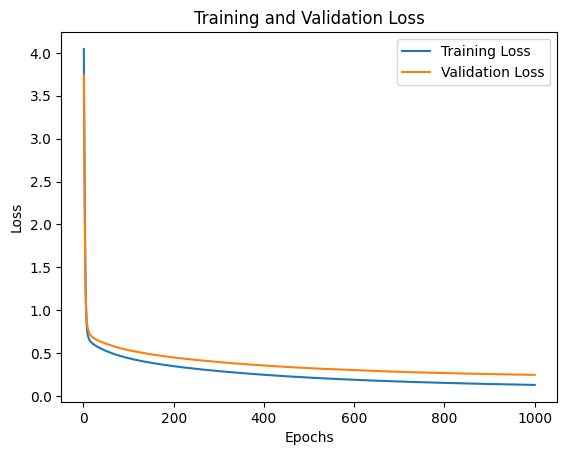

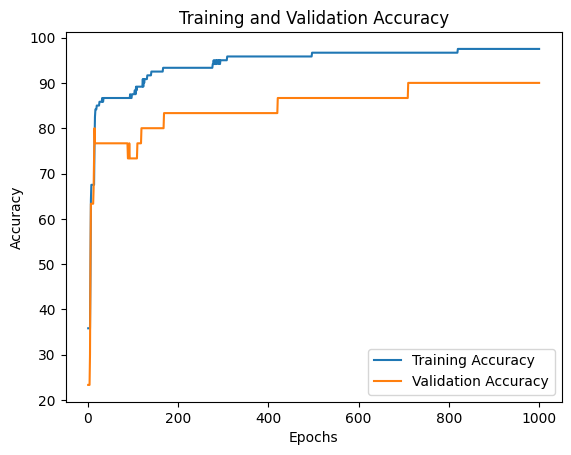

In [ ]:
# Plot loss over epochs
epochs = np.array(epochs)

plt.plot(epochs, epoch_train_loss, label='Training Loss')
plt.plot(epochs, epoch_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy over epochs
plt.plot(epochs, epoch_train_acc, label='Training Accuracy')
plt.plot(epochs, epoch_val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NEXT STEPS

Comment code and add all the maths calcs
Implement Stochastic Gradient Descent (??)
Implement early stopping
Make the training cycle a function so my main is minimal and can be repeated for different scenarios (maybe parameterize and then can easily compare scenario results.
How to 'see' this data as a cluster map? Hypothesis that it is easy to classify - run a logistic regression on it.
Implement K-folds - and other methods to make the best of a small dataset.
Synthetic data?
Implement temperature on the softmax and play with this.
Create alternative BP calcs with a2 and z2 rather than just z2 - review the maths.
Review detailed YT vids and implement NN as a class.
Comment on the sensitivity of the model to hyperparameters.
Implement dropout to randomly turn to zero a fraction of nodes - is this to prevent overfitting?

If you have a small dataset, consider augmenting your training data with transformations such as rotation, translation, or flipping. Data augmentation can provide the model with more diverse examples to learn from and prevent overfitting.

---

If your neural network is converging too quickly and then getting stuck at a suboptimal solution, you can try several techniques to slow down the convergence and potentially reach a better solution:

Reduce Learning Rate: Decrease the learning rate to slow down the updates to the model parameters. A smaller learning rate allows the model to explore the parameter space more gradually, potentially avoiding getting stuck in local minima.

Learning Rate Scheduling: Instead of using a fixed learning rate throughout training, consider using learning rate scheduling techniques such as exponential decay or step decay to gradually reduce the learning rate over epochs. This can help the model to converge more gradually.

Early Stopping: Monitor the validation performance of the model during training and stop training when the validation performance stops improving. Early stopping prevents overfitting and allows the model to find a better solution.

Batch Normalization: Use batch normalization layers in your neural network. Batch normalization can stabilize training by normalizing the activations of each layer and reducing the internal covariate shift, which can lead to faster convergence and better performance.

Regularization: Apply regularization techniques such as L1 or L2 regularization, dropout, or weight decay to prevent overfitting and improve generalization. Regularization can help the model to learn more slowly and generalize better to unseen data.

Increase Model Complexity: If your model is too simple, it may struggle to learn complex patterns in the data. Consider increasing the capacity of your model by adding more layers or units to better capture the underlying structure of the data.

Data Augmentation: If you have a small dataset, consider augmenting your training data with transformations such as rotation, translation, or flipping. Data augmentation can provide the model with more diverse examples to learn from and prevent overfitting.

---

Fluctuations in validation accuracy between epochs can occur due to several reasons:

Small Validation Set: If your validation set is small, it may not be representative of the overall distribution of the data. As a result, the validation accuracy can fluctuate between epochs due to random variations in the samples selected for validation.

High Learning Rate: A high learning rate can cause the model to oscillate around the optimal solution, leading to fluctuations in validation accuracy. Consider reducing the learning rate to stabilize training.

Model Instability: If the model architecture is unstable or if the training process is not properly regularized, the model may exhibit oscillations in performance between epochs. Regularization techniques such as dropout, weight decay, or batch normalization can help stabilize training.

Early Stopping: If you're using early stopping based on validation performance, fluctuations in validation accuracy can occur as the training is stopped when the validation performance does not improve for a certain number of epochs. This can result in variations in the final validation accuracy depending on when the training is stopped.

Data Variability: If the validation set contains highly variable or noisy samples, the model may perform differently on different subsets of the validation data, leading to fluctuations in validation accuracy.

Model Complexity: If the model is too complex relative to the size of the training data or if the model capacity is not well matched to the complexity of the task, the model may overfit the training data, leading to fluctuations in validation accuracy.

To address fluctuations in validation accuracy, you can try the following:

Increase the size of the validation set to improve its representativeness.
Experiment with different learning rates and regularization techniques to stabilize training.
Use techniques such as early stopping or model averaging to prevent overfitting and improve generalization performance.
Ensure that the model architecture and complexity are appropriate for the task and dataset.




Stuff re FastAPI

curl -X POST http://127.0.0.1:8000/which_species_is_this \
     -H "Content-Type: application/json" \
     -d '{"sepal_len": 5.1, "sepal_wid": 3.5, "petal_len": 1.4, "petal_wid": 0.2}'
Change 127.0.0.1 to your own ip



Try implementing Kfold:

```
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target variable
kf = KFold(n_splits=5, shuffle=True)  # Define the number of splits (k) and whether to shuffle the data

accuracies = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]  # Split features into train and validation sets
    y_train, y_val = y[train_index], y[val_index]  # Split target variable into train and validation sets
    
    # Train your model on X_train and y_train
    
    # Evaluate your model on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Calculate the average accuracy over all folds
average_accuracy = sum(accuracies) / len(accuracies)
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

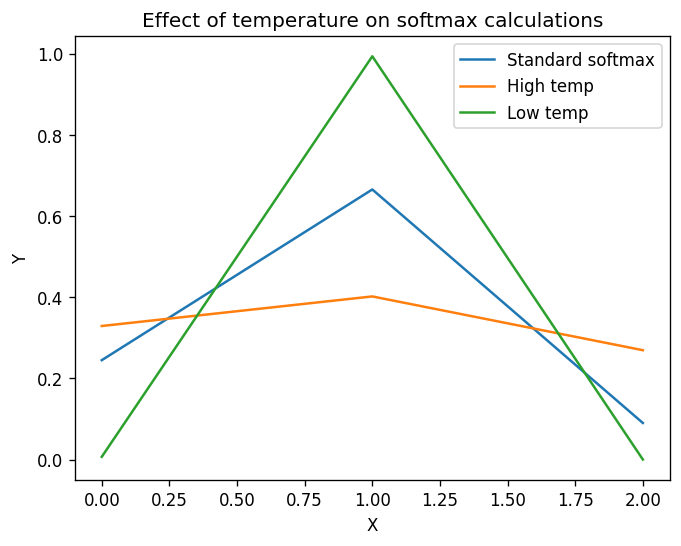

In [ ]:
def softmax(x, tau):
    # Subtract the max value of x to ensure numerical stability ???!!!!
    x -= np.max(x, axis=1, keepdims=True)
    exp_scores = np.exp(x / tau)
    softmax_scores = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return softmax_scores


ZZ = np.array([[19, 20, 18]]).reshape(1, -1)

# Standard softmax
A_std = softmax(ZZ, 1)[0]

# High Temperature softmax
A_high = softmax(ZZ, 5)[0]

# Low temperature softmax
A_low = softmax(ZZ, 0.2)[0]

# Plot the results
plt.figure(dpi=120)
plt.plot(A_std, label='Standard softmax')
plt.plot(A_high, label='High temp')
plt.plot(A_low, label='Low temp')
plt.title('Effect of temperature on softmax calculations')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()





---

# **5. Resources**

RMSProp and ADAM
https://medium.com/analytics-vidhya/a-complete-guide-to-adam-and-rmsprop-optimizer-75f4502d83be

https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

Building makemore Part 4: Becoming a Backprop Ninja
https://www.youtube.com/watch?v=q8SA3rM6ckI&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=6&t=939s


Matrix multiplication animation
https://www.youtube.com/watch?v=1hf_cHNbgCk


The Matrix Calculus You Need For Deep Learning
https://explained.ai/matrix-calculus/#sec:1.2



Softmax derivative
https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/
https://www.mldawn.com/the-derivative-of-softmaxz-function-w-r-t-z/

```
# utility function we will use later when comparing manual gradients to PyTorch gradients
def cmp(s, dt, t):
  ex = torch.all(dt == t.grad).item()
  app = torch.allclose(dt, t.grad)
  maxdiff = (dt - t.grad).abs().max().item()
  print(f'{s:15s} | exact: {str(ex):5s} | approximate: {str(app):5s} | maxdiff: {maxdiff}')
```

Deploy ML models with FastAPI, Docker, and Heroku | Tutorial
https://www.youtube.com/watch?v=h5wLuVDr0oc

Dockerize FastAPI project like a pro - Step-by-step Tutorial
https://www.youtube.com/watch?si=ll6mFzr_MblIIsGE&v=CzAyaSolZjY&feature=youtu.be

5 Examples of Nonlinear Relationships Between Variables
https://www.statology.org/nonlinear-relationship-examples/

Setting your username in Git
https://docs.github.com/en/get-started/getting-started-with-git/setting-your-username-in-git

Getting Git right
https://www.atlassian.com/git

Why You NEED To Learn FastAPI | Hands On Project
https://www.youtube.com/watch?v=cbASjoZZGIw

Weight Initialization explained | A way to reduce the vanishing gradient problem  
https://www.youtube.com/watch?v=8krd5qKVw-Q


